In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("ml_project1_data.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df = df.drop(["Dt_Customer", "ID"], axis = 1)

## Change Year_Birth to Age(used 2024)

In [4]:
df["Age"] = 2024 - df["Year_Birth"]
df = df.drop(["Year_Birth"], axis = 1)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,3,11,1,67
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,3,11,0,70
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,3,11,0,59
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,3,11,0,40
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,3,11,0,43


## Checking null value

In [5]:
# using isnull() to check if there is any null value
df.isnull().sum()

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
dtype: int64

There are 24 null value in Income columns, and we would like to replace them based on customer's education level.

We would calculate average income for each education level.

In [6]:
# created the dictionary to help us store mean income for each education level
mean_income = round(df[~df["Income"].isnull()].groupby("Education")["Income"].mean(), 2)
mean_income_dic = mean_income.to_dict()

In [7]:
# fill null values in income column based on each customer's education
df["Income"] = df["Income"].fillna(df["Education"].map(mean_income_dic))

In [8]:
df.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
dtype: int64

## using one-hot encoding to change the type of categorical data (Education, Marital_Status)

In [9]:
# used get_dummy function to get boolen value for each categorical column
one_hot_encoding_df = pd.get_dummies(df, columns=["Education", "Marital_Status"])

# find columns including boolen value
boolen_col = one_hot_encoding_df.select_dtypes(include="bool").columns
one_hot_encoding_df[boolen_col] = one_hot_encoding_df[boolen_col].astype(int)

In [10]:
one_hot_encoding_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2240 non-null   float64
 1   Kidhome                  2240 non-null   int64  
 2   Teenhome                 2240 non-null   int64  
 3   Recency                  2240 non-null   int64  
 4   MntWines                 2240 non-null   int64  
 5   MntFruits                2240 non-null   int64  
 6   MntMeatProducts          2240 non-null   int64  
 7   MntFishProducts          2240 non-null   int64  
 8   MntSweetProducts         2240 non-null   int64  
 9   MntGoldProds             2240 non-null   int64  
 10  NumDealsPurchases        2240 non-null   int64  
 11  NumWebPurchases          2240 non-null   int64  
 12  NumCatalogPurchases      2240 non-null   int64  
 13  NumStorePurchases        2240 non-null   int64  
 14  NumWebVisitsMonth       

## Checking outliers


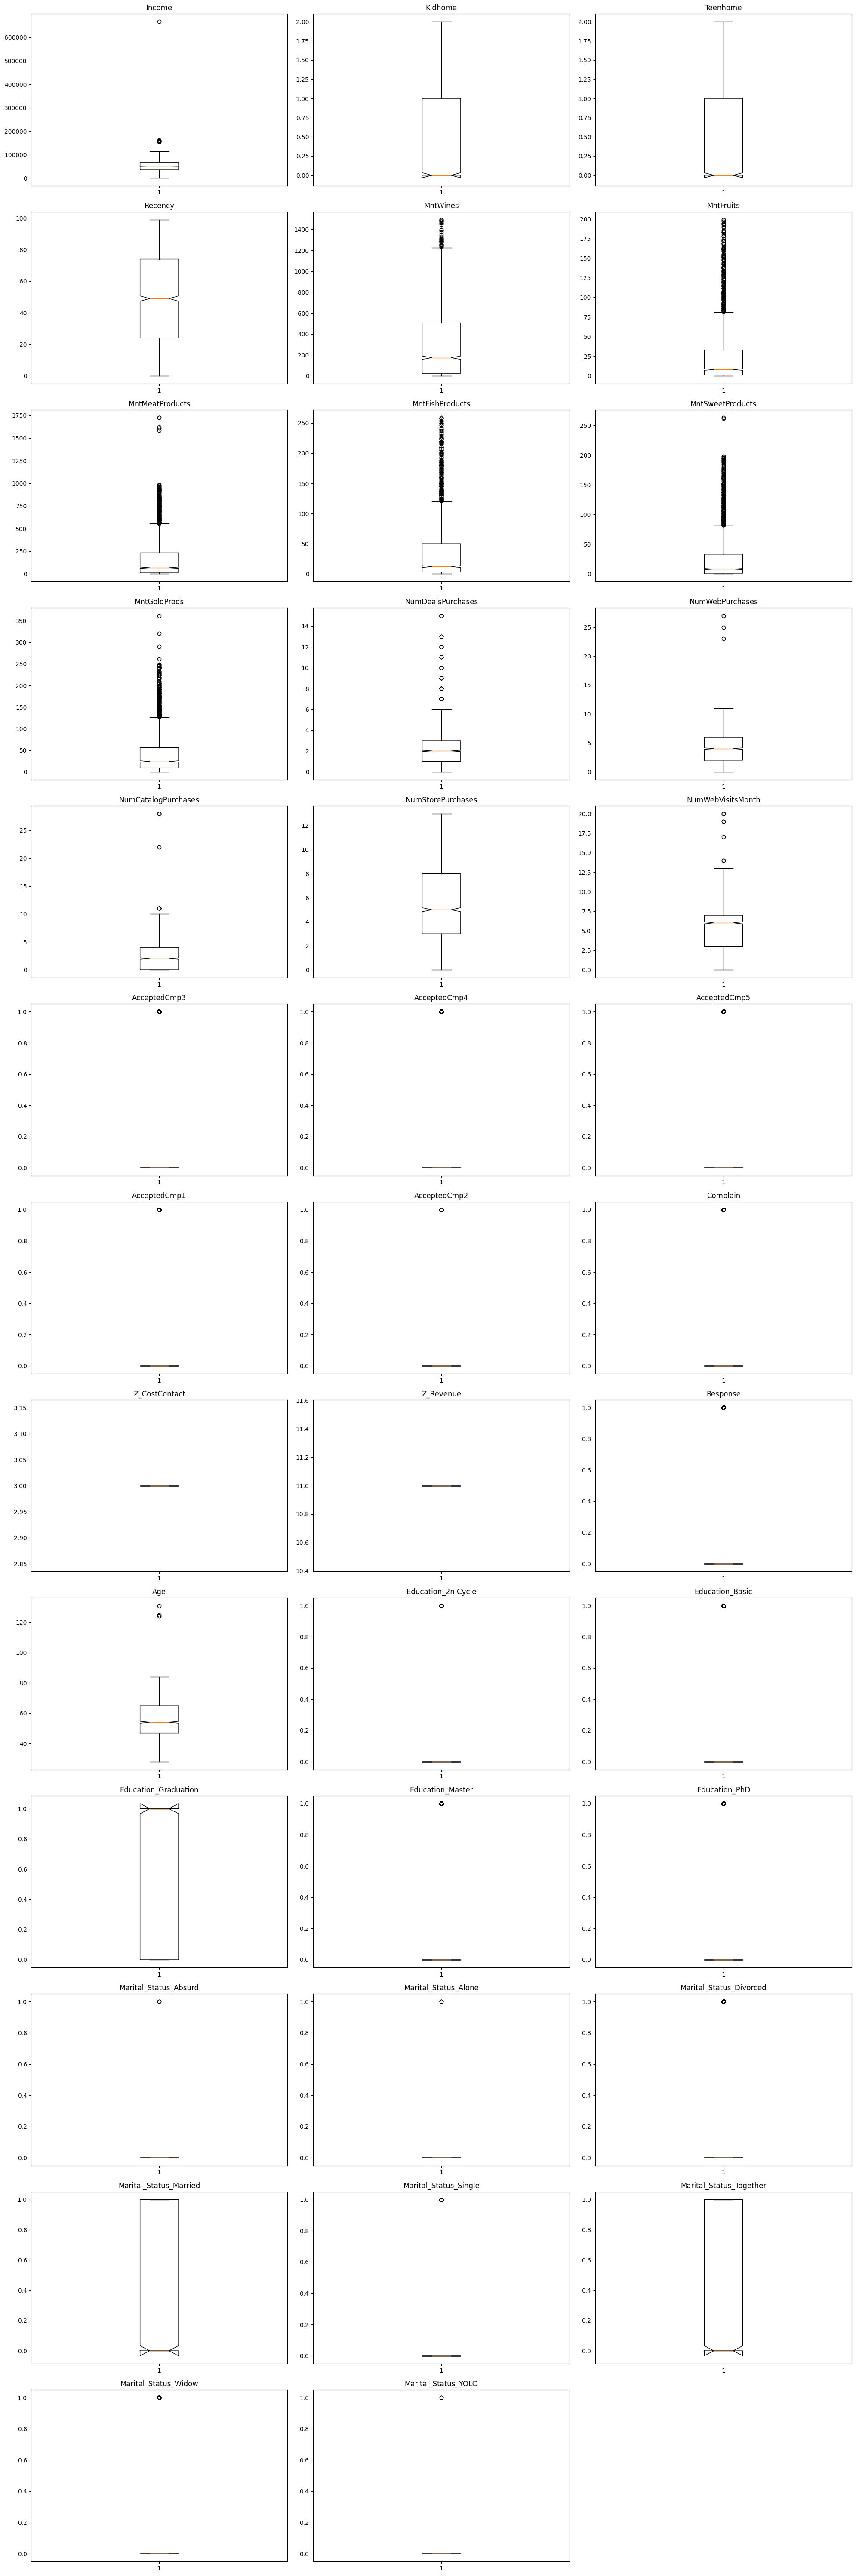

In [11]:
list_columns = one_hot_encoding_df.columns


plt.figure(figsize=(20, 60))

for i, column  in enumerate(list_columns, 1):
    plt.subplot(13, 3, i)
    plt.boxplot(one_hot_encoding_df[f"{column}"], "rs")
    plt.title(column)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [12]:
filtered_df = one_hot_encoding_df[(one_hot_encoding_df["Income"] < 600000) & (one_hot_encoding_df["Recency"] < 22)]

filtered_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
5,62513.00,0,1,16,520,42,98,0,42,14,...,1,0,0,0,0,0,0,1,0,0
8,30351.00,1,0,19,14,0,24,3,3,2,...,0,1,0,0,0,0,0,1,0,0
10,52720.37,1,0,11,5,5,6,0,2,1,...,0,0,0,0,0,1,0,0,0,0
17,37760.00,0,0,20,84,5,38,150,12,28,...,0,0,0,0,0,0,0,1,0,0
23,65324.00,0,1,0,384,0,102,21,32,5,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214,5305.00,0,1,12,12,4,7,1,3,5,...,0,0,0,0,0,1,0,0,0,0
2221,75777.00,0,0,12,712,26,538,69,13,80,...,1,0,0,0,0,0,1,0,0,0
2222,7500.00,1,0,7,2,8,11,3,8,21,...,0,0,0,0,0,0,0,1,0,0
2229,24434.00,2,0,9,3,2,8,20,0,17,...,0,0,0,0,0,1,0,0,0,0


## clustering analysis

### check Scale of measurement

In [13]:
# select categorical columns
binary_categorical_cols = [col for col in filtered_df.columns if filtered_df[col].nunique() == 2]
# select numerical columns
numerical_cols = [col for col in filtered_df.columns if col not in binary_categorical_cols]

binary_categorical_df = filtered_df[binary_categorical_cols]
numerical_df = filtered_df[numerical_cols]

#### Numerical : Standardization or **normalization**

In [14]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numerical_df)
normalized_df = pd.DataFrame(normalized_data, columns=numerical_df.columns)
normalized_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Marital_Status_Absurd
0,0.371447,0.0,0.5,0.761905,0.351827,0.213198,0.056812,0.000000,0.159696,0.038674,0.133333,0.222222,0.142857,0.769231,0.352941,0.0,0.0,0.54,0.0
1,0.165775,0.5,0.0,0.904762,0.009472,0.000000,0.013913,0.011583,0.011407,0.005525,0.066667,0.111111,0.000000,0.153846,0.529412,0.0,0.0,0.40,0.0
2,0.308824,0.5,0.0,0.523810,0.003383,0.025381,0.003478,0.000000,0.007605,0.002762,0.066667,0.037037,0.000000,0.153846,0.411765,0.0,0.0,0.22,0.0
3,0.213154,0.0,0.0,0.952381,0.056834,0.025381,0.022029,0.579151,0.045627,0.077348,0.133333,0.148148,0.035714,0.461538,0.411765,0.0,0.0,0.96,0.0
4,0.389423,0.0,0.5,0.000000,0.259811,0.000000,0.059130,0.081081,0.121673,0.013812,0.200000,0.222222,0.071429,0.692308,0.235294,0.0,0.0,0.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,0.005608,0.0,0.5,0.571429,0.008119,0.020305,0.004058,0.003861,0.011407,0.013812,0.000000,0.037037,0.000000,0.000000,0.764706,0.0,0.0,0.36,0.0
494,0.456269,0.0,0.0,0.571429,0.481732,0.131980,0.311884,0.266409,0.049430,0.220994,0.066667,0.111111,0.214286,0.846154,0.058824,0.0,0.0,0.24,0.0
495,0.019645,0.5,0.0,0.333333,0.001353,0.040609,0.006377,0.011583,0.030418,0.058011,0.266667,0.111111,0.071429,0.153846,0.411765,0.0,0.0,0.30,0.0
496,0.127936,1.0,0.0,0.428571,0.002030,0.010152,0.004638,0.077220,0.000000,0.046961,0.133333,0.074074,0.035714,0.153846,0.411765,0.0,0.0,0.44,0.0


#### Catergorical : one hot encoding

In [15]:
binary_categorical_df = binary_categorical_df.reset_index().drop(["index"], axis = 1)

In [16]:
final_df = pd.concat([normalized_df, binary_categorical_df], axis = 1)
final_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.371447,0.0,0.5,0.761905,0.351827,0.213198,0.056812,0.000000,0.159696,0.038674,...,0,1,0,0,0,0,0,1,0,0
1,0.165775,0.5,0.0,0.904762,0.009472,0.000000,0.013913,0.011583,0.011407,0.005525,...,0,0,1,0,0,0,0,1,0,0
2,0.308824,0.5,0.0,0.523810,0.003383,0.025381,0.003478,0.000000,0.007605,0.002762,...,1,0,0,0,0,1,0,0,0,0
3,0.213154,0.0,0.0,0.952381,0.056834,0.025381,0.022029,0.579151,0.045627,0.077348,...,1,0,0,0,0,0,0,1,0,0
4,0.389423,0.0,0.5,0.000000,0.259811,0.000000,0.059130,0.081081,0.121673,0.013812,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,0.005608,0.0,0.5,0.571429,0.008119,0.020305,0.004058,0.003861,0.011407,0.013812,...,1,0,0,0,0,1,0,0,0,0
494,0.456269,0.0,0.0,0.571429,0.481732,0.131980,0.311884,0.266409,0.049430,0.220994,...,0,1,0,0,0,0,1,0,0,0
495,0.019645,0.5,0.0,0.333333,0.001353,0.040609,0.006377,0.011583,0.030418,0.058011,...,0,0,0,0,0,0,0,1,0,0
496,0.127936,1.0,0.0,0.428571,0.002030,0.010152,0.004638,0.077220,0.000000,0.046961,...,1,0,0,0,0,1,0,0,0,0


We can use UMAP to decrease dimension

### UMAP

In [17]:
import umap
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

c:\Users\ah881\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
umap_reducer = umap.UMAP(n_components = 2, random_state = 42)
umap_result = umap_reducer.fit_transform(final_df)

c:\Users\ah881\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [19]:
umap_df = pd.DataFrame(umap_result, columns = ["UMAP1", "UMAP2"])
umap_df

,UMAP1,UMAP2
0,1.762836,8.660258
1,-3.959876,3.910124
2,11.019242,10.064618
3,8.975025,-1.330557
4,-3.664734,7.538677
...,...,...
493,12.193899,9.977779
494,4.725810,8.339009
495,3.697286,4.687469
496,10.850326,10.097178


### using DBI to evaluate the performace of clustering model

In [20]:
kmeans = KMeans(n_clusters = 7, random_state = 42)
kmeans.fit(umap_df)
labels = kmeans.labels_

dbi = davies_bouldin_score(umap_df, labels)
print("Davies-Bouldin Index: ", round(dbi, 3) )

Davies-Bouldin Index:  0.576


### showing how many data point in each group

In [21]:
umap_df["cluster"] = labels
umap_df["cluster"].value_counts()

cluster
4    108
3     92
1     74
2     67
5     63
0     57
6     37
Name: count, dtype: int64

### Creating the plot of K-means clustering analysis

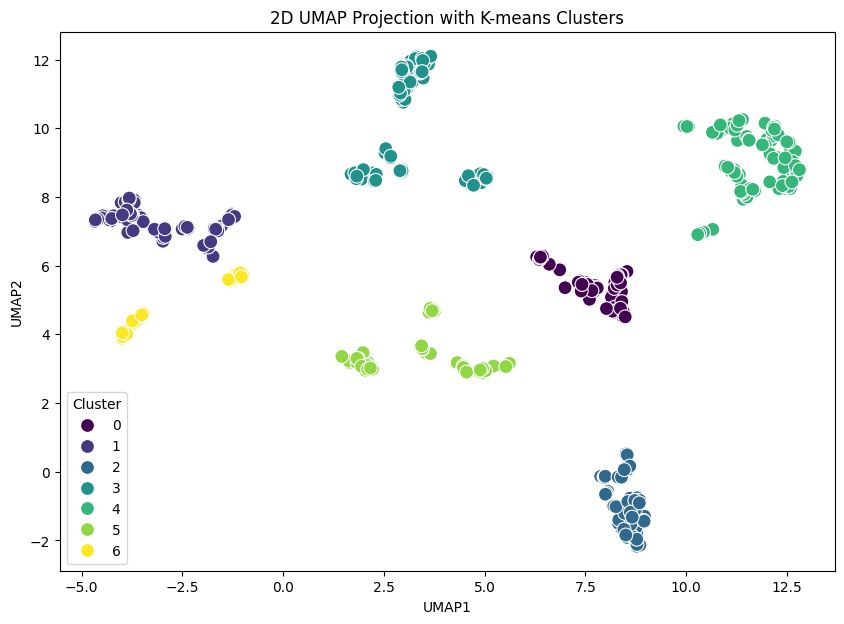

In [22]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='cluster', palette='viridis', data=umap_df, s=100)
plt.title('2D UMAP Projection with K-means Clusters')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Cluster')
plt.show()

In [23]:
original = scaler.inverse_transform(normalized_df)
original_df = pd.DataFrame(original, columns=normalized_df.columns)
original_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Marital_Status_Absurd
0,62513.00,0.0,1.0,16.0,520.0,42.0,98.0,0.0,42.0,14.0,2.0,6.0,4.0,10.0,6.0,3.0,11.0,57.0,0.0
1,30351.00,1.0,0.0,19.0,14.0,0.0,24.0,3.0,3.0,2.0,1.0,3.0,0.0,2.0,9.0,3.0,11.0,50.0,0.0
2,52720.37,1.0,0.0,11.0,5.0,5.0,6.0,0.0,2.0,1.0,1.0,1.0,0.0,2.0,7.0,3.0,11.0,41.0,0.0
3,37760.00,0.0,0.0,20.0,84.0,5.0,38.0,150.0,12.0,28.0,2.0,4.0,1.0,6.0,7.0,3.0,11.0,78.0,0.0
4,65324.00,0.0,1.0,0.0,384.0,0.0,102.0,21.0,32.0,5.0,3.0,6.0,2.0,9.0,4.0,3.0,11.0,70.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,5305.00,0.0,1.0,12.0,12.0,4.0,7.0,1.0,3.0,5.0,0.0,1.0,0.0,0.0,13.0,3.0,11.0,48.0,0.0
494,75777.00,0.0,0.0,12.0,712.0,26.0,538.0,69.0,13.0,80.0,1.0,3.0,6.0,11.0,1.0,3.0,11.0,42.0,0.0
495,7500.00,1.0,0.0,7.0,2.0,8.0,11.0,3.0,8.0,21.0,4.0,3.0,2.0,2.0,7.0,3.0,11.0,45.0,0.0
496,24434.00,2.0,0.0,9.0,3.0,2.0,8.0,20.0,0.0,17.0,2.0,2.0,1.0,2.0,7.0,3.0,11.0,52.0,0.0


In [24]:
accepted_cmp_df = final_df[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5",
         "Response"]].copy()

In [25]:
accepted_cmp_df["total_accepted"] = accepted_cmp_df["AcceptedCmp1"] + accepted_cmp_df["AcceptedCmp2"] + accepted_cmp_df["AcceptedCmp3"]+accepted_cmp_df["AcceptedCmp4"] + accepted_cmp_df["AcceptedCmp5"] + accepted_cmp_df["Response"]
accepted_cmp_df

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,total_accepted
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
493,0,0,0,0,0,0,0
494,0,0,0,1,1,1,3
495,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0


In [26]:
# move cluster column from umap_df to original_df 
moved_col = umap_df.pop("cluster")
original_df["cluster"] = moved_col

# move total_accepted column from accepted_cmp_df to original_df
moved_total_accepted = accepted_cmp_df.pop("total_accepted")
original_df["total_accepted"] = moved_total_accepted
original_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Marital_Status_Absurd,cluster,total_accepted
0,62513.00,0.0,1.0,16.0,520.0,42.0,98.0,0.0,42.0,14.0,...,6.0,4.0,10.0,6.0,3.0,11.0,57.0,0.0,3,0
1,30351.00,1.0,0.0,19.0,14.0,0.0,24.0,3.0,3.0,2.0,...,3.0,0.0,2.0,9.0,3.0,11.0,50.0,0.0,6,1
2,52720.37,1.0,0.0,11.0,5.0,5.0,6.0,0.0,2.0,1.0,...,1.0,0.0,2.0,7.0,3.0,11.0,41.0,0.0,4,0
3,37760.00,0.0,0.0,20.0,84.0,5.0,38.0,150.0,12.0,28.0,...,4.0,1.0,6.0,7.0,3.0,11.0,78.0,0.0,2,0
4,65324.00,0.0,1.0,0.0,384.0,0.0,102.0,21.0,32.0,5.0,...,6.0,2.0,9.0,4.0,3.0,11.0,70.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,5305.00,0.0,1.0,12.0,12.0,4.0,7.0,1.0,3.0,5.0,...,1.0,0.0,0.0,13.0,3.0,11.0,48.0,0.0,4,0
494,75777.00,0.0,0.0,12.0,712.0,26.0,538.0,69.0,13.0,80.0,...,3.0,6.0,11.0,1.0,3.0,11.0,42.0,0.0,3,3
495,7500.00,1.0,0.0,7.0,2.0,8.0,11.0,3.0,8.0,21.0,...,3.0,2.0,2.0,7.0,3.0,11.0,45.0,0.0,5,0
496,24434.00,2.0,0.0,9.0,3.0,2.0,8.0,20.0,0.0,17.0,...,2.0,1.0,2.0,7.0,3.0,11.0,52.0,0.0,4,0


In [27]:
# finding the average number of accepting campaign each group accepted
grouped_data = original_df.groupby("cluster").mean()
grouped_data.round(2)["total_accepted"]
#grouped_data.to_csv("group_data.csv")

cluster
0    0.65
1    0.81
2    0.54
3    0.51
4    0.44
5    0.68
6    0.32
Name: total_accepted, dtype: float64

In [28]:
grouped_data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Marital_Status_Absurd,total_accepted
cluster,,,,,,,,,,,,,,,,,,,,
0,48420.445088,0.491228,0.403509,9.666667,237.719298,27.526316,133.070175,31.140351,25.877193,49.421053,1.929825,4.473684,2.298246,4.964912,5.526316,3.0,11.0,50.228070,0.0,0.649123
1,60033.125811,0.364865,0.513514,9.743243,420.662162,23.810811,192.486486,29.378378,29.743243,27.432432,2.621622,4.864865,3.216216,6.094595,5.013514,3.0,11.0,57.135135,0.0,0.810811
2,53930.671642,0.388060,0.507463,10.447761,292.507463,29.119403,205.029851,41.447761,25.641791,47.388060,2.358209,4.313433,3.134328,6.149254,5.104478,3.0,11.0,57.194030,0.0,0.537313
3,50137.978261,0.456522,0.489130,9.478261,310.793478,18.152174,150.173913,24.739130,16.489130,38.456522,2.445652,3.858696,2.336957,6.054348,5.586957,3.0,11.0,56.402174,0.0,0.510870
4,48269.096019,0.462963,0.425926,10.277778,226.472222,30.731481,172.092593,49.101852,25.685185,49.518519,2.287037,3.731481,2.472222,5.212963,5.453704,3.0,11.0,53.018519,0.0,0.435185
5,52934.888889,0.301587,0.444444,10.920635,233.095238,38.269841,152.095238,44.412698,44.460317,45.428571,1.952381,4.000000,2.714286,6.047619,5.031746,3.0,11.0,52.222222,0.0,0.682540
6,53721.008378,0.459459,0.594595,10.243243,365.540541,22.621622,162.972973,28.405405,15.594595,31.459459,1.918919,4.081081,2.216216,6.054054,5.702703,3.0,11.0,58.054054,0.0,0.324324


## final part

Because our data is limited, we will split our data into original_customer and new_customer.

### 1. spliting the data after UMAP, and we can get the data which has two dimensions. That will help us creat the scatter plot.

In [29]:
umap_df.head()

,UMAP1,UMAP2
0,1.762836,8.660258
1,-3.959876,3.910124
2,11.019242,10.064618
3,8.975025,-1.330557
4,-3.664734,7.538677


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# 80% of the data will be used for training and view 20% of data as new customers
# # the 'random_state' ebsures that the splits are reproducible
train_data, new_customer= train_test_split(umap_df, test_size = 0.2, random_state=0)

In [32]:
new_customer = new_customer.reset_index()
index_list = list(new_customer['index'])

In [33]:
new_customer = new_customer.drop(["index"], axis = 1)
new_customer

,UMAP1,UMAP2
0,2.218049,8.580875
1,7.980225,-0.169923
2,8.148408,5.081479
3,-1.357639,5.594612
4,10.654050,9.881678
...,...,...
95,-1.308950,5.575183
96,6.291517,6.253215
97,8.465467,0.060831
98,5.560547,3.069428


### 2. evaluate whether we can pick the group which has the greatest average number of accepting campaign 

In [34]:
kmeans.fit(new_customer)
labels = kmeans.labels_
new_customer["cluster"] = labels
new_customer["cluster"].value_counts()

cluster
4    27
1    20
2    19
3    11
6    10
5     9
0     4
Name: count, dtype: int64

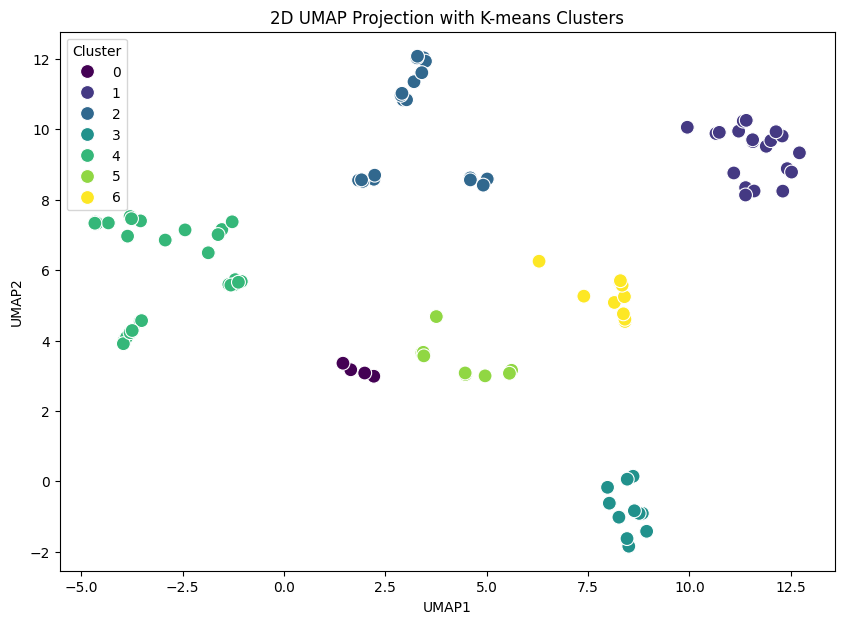

In [35]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='cluster', palette='viridis', data=new_customer, s=100)
plt.title('2D UMAP Projection with K-means Clusters')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Cluster')
plt.show()

### 3. Applying this model, we can find the customers who are willing to accept campaign.

In [36]:
ori_data_2 = original_df.drop(["cluster"], axis= 1).loc[index_list]


In [37]:
ori_data_2

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Marital_Status_Absurd,total_accepted
90,43795.0,0.0,1.0,11.0,314.0,11.0,53.0,4.0,3.0,107.0,3.0,7.0,3.0,4.0,7.0,3.0,11.0,56.0,0.0,2
254,83145.0,0.0,0.0,14.0,777.0,35.0,731.0,39.0,137.0,114.0,1.0,5.0,9.0,11.0,2.0,3.0,11.0,50.0,0.0,2
283,7500.0,1.0,1.0,5.0,6.0,5.0,4.0,13.0,4.0,25.0,4.0,2.0,1.0,3.0,6.0,3.0,11.0,46.0,0.0,0
443,25509.0,1.0,0.0,15.0,40.0,3.0,30.0,10.0,7.0,11.0,3.0,3.0,0.0,3.0,9.0,3.0,11.0,50.0,0.0,1
336,33039.0,1.0,0.0,4.0,30.0,8.0,12.0,8.0,8.0,12.0,1.0,2.0,0.0,4.0,5.0,3.0,11.0,46.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,25509.0,1.0,0.0,15.0,40.0,3.0,30.0,10.0,7.0,11.0,3.0,3.0,0.0,3.0,9.0,3.0,11.0,50.0,0.0,1
56,52195.0,2.0,1.0,2.0,12.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,8.0,3.0,11.0,46.0,0.0,0
438,34600.0,1.0,1.0,8.0,199.0,33.0,60.0,8.0,3.0,15.0,5.0,5.0,2.0,5.0,8.0,3.0,11.0,53.0,0.0,1
60,102692.0,0.0,0.0,5.0,168.0,148.0,444.0,32.0,172.0,148.0,1.0,6.0,9.0,13.0,2.0,3.0,11.0,50.0,0.0,5


In [38]:
ori_data_2["cluster"] = labels


In [39]:
# take mean of grouped data
ori_data_2.groupby("cluster").mean()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Marital_Status_Absurd,total_accepted
cluster,,,,,,,,,,,,,,,,,,,,
0,48987.000000,0.750000,0.000000,10.250000,128.750000,9.250000,57.000000,26.750000,27.250000,27.000000,2.000000,4.000000,1.750000,4.250000,6.250000,3.0,11.0,42.250000,0.0,1.500000
1,42492.100000,0.450000,0.350000,10.400000,204.050000,14.200000,206.300000,43.750000,13.850000,35.700000,2.450000,3.050000,2.100000,5.050000,5.400000,3.0,11.0,53.200000,0.0,0.350000
2,48460.578947,0.473684,0.315789,9.368421,307.263158,18.105263,153.368421,27.157895,25.000000,36.789474,1.947368,3.789474,2.578947,6.157895,6.000000,3.0,11.0,53.842105,0.0,0.578947
3,56167.181818,0.181818,0.545455,11.818182,475.272727,25.272727,205.909091,31.272727,41.090909,34.272727,2.181818,4.272727,3.545455,7.272727,4.909091,3.0,11.0,58.545455,0.0,0.818182
4,51804.814815,0.444444,0.444444,10.629630,334.185185,14.851852,106.444444,19.444444,9.629630,27.148148,2.185185,4.296296,1.592593,4.777778,6.074074,3.0,11.0,59.074074,0.0,0.703704
5,48787.111111,0.222222,0.444444,13.111111,241.111111,41.888889,162.666667,23.555556,40.888889,60.888889,1.444444,4.666667,3.444444,6.000000,6.111111,3.0,11.0,53.555556,0.0,1.222222
6,44269.700000,0.600000,0.600000,10.700000,202.200000,31.100000,124.500000,24.900000,18.200000,42.400000,2.400000,3.800000,2.100000,5.400000,5.500000,3.0,11.0,47.300000,0.0,0.200000


In [40]:
# only show the mean of total_accepted for each cluster
ori_data_2.groupby("cluster").mean()["total_accepted"]

cluster
0    1.500000
1    0.350000
2    0.578947
3    0.818182
4    0.703704
5    1.222222
6    0.200000
Name: total_accepted, dtype: float64

In [41]:
total_num_campaign_each_cluster = ori_data_2["cluster"].value_counts()*6
num_accepted_campaign = ori_data_2.groupby("cluster")["total_accepted"].sum()

# show the % accepted
round(num_accepted_campaign / total_num_campaign_each_cluster, 2)

cluster
0    0.25
1    0.06
2    0.10
3    0.14
4    0.12
5    0.20
6    0.03
dtype: float64

Because in our model, we found that customer with higher income tend to accept more campaigns. Therefore, after applying model for new customers, we can easily find the customers with higher income, and help us improve the accept rate of campaigns, also decrease the cost.